In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pickle
import copy
import datetime
import torch
import gym
import custom_gym
import random
from config import cfg_seed, cfg_env, cfg_z_dim, cfg_default_lr, cfg_default_early
seed = cfg_seed
env_str=cfg_env
default_lr=cfg_default_lr
default_early=cfg_default_early

if cfg_env == "pendulum":
    env_name = "CustomPendulum-v0"
if cfg_env == "cartpole":
    env_name = "CustomCartPole-v0"

figfilenamehead = "fig_policy_evaluation_"+cfg_env+"_"

num_iter_max=200000
print(datetime.datetime.now())

2023-06-05 19:29:37.546622


In [2]:
env = gym.make(env_name)


random.seed(seed)
np.random.seed(seed)
env.seed(seed)
env.action_space.seed(seed)
torch.manual_seed(seed)

s_dim = env.reset().flatten().shape[0]
a_dim = env.action_space.sample().flatten().shape[0]
z_dim = cfg_z_dim
print(s_dim, a_dim, z_dim)


2 1 1


/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/home/proxima-hishinuma/anaconda3/

In [3]:
from sac import SAC
agent = SAC(env.observation_space.shape[0], env.action_space)
agent.load_checkpoint(ckpt_path="checkpoints/sac_checkpoint_custom_"+env_str+"_mdp_", evaluate=True)

Loading models from checkpoints/sac_checkpoint_custom_pendulum_mdp_


In [4]:
# # # # データ生成
from get_offline_data import getOfflineData
getOfflineData(env_name=env_name, episode_num=100, seed=seed)

/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:227: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(done, (bool, np.bool8)):
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:141: UserWarning: WARN: The obs returned by the `step()` method was expecting numpy array dtype to be float32, actual type: float64
  logger.warn(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:165: UserWarning: WARN: The obs returned by the `step()` method is not within the observ

In [5]:
offline_data = pickle.load(open("offline_data_"+env_str+".pkl","rb"))

debug_info = pickle.load(open("offline_data_debug_info_"+env_str+".pkl","rb"))
debug_info = np.array(debug_info)
print("offline_data[1].sum()", offline_data[1].sum())
print(debug_info.shape)


offline_data[1].sum() tensor(1117.7324)
(100, 2)


In [6]:
import vi_base

args_init_dict = {
    "offline_data": offline_data,
    "s_dim": s_dim,
    "a_dim": a_dim,
    "z_dim": z_dim,
    #              "policy":agent.select_action,
    "mdp_policy":agent.policy.my_np_select_action,
    "bamdp_policy":None,
    "debug_info":debug_info,
    "env" : env,
    "ckpt_suffix" : env_str,
}

vi = vi_base.baseVI(args_init_dict)

dec: h_dim 48


In [7]:
vi.get_real_rollout_mdppolicy_data()

0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   


tensor(4.2621)tensor(6.6452)tensor(4.1889)tensor(4.0862)tensor(3.3755)tensor(2.7698)tensor(6.5936)tensor(3.2533)tensor(3.3771)tensor(3.4203)tensor(5.7446)tensor(3.0737)tensor(3.4739)tensor(4.3558)tensor(3.6484)tensor(3.9607)tensor(5.9470)tensor(2.9305)tensor(3.2794)tensor(4.2455)tensor(8.7165)tensor(4.2930)tensor(5.9799)tensor(4.4537)tensor(6.8111)tensor(7.1291)tensor(4.4072)tensor(6.3866)tensor(6.6811)tensor(5.8703)tensor(6.8926)tensor(6.8138)tensor(7.6306)tensor(6.1779)tensor(4.2049)tensor(3.1644)tensor(6.6341)tensor(7.5226)tensor(4.4436)tensor(5.5293)tensor(3.0883)tensor(4.7125)tensor(6.6783)tensor(3.1289)tensor(4.6613)tensor(3.5377)tensor(8.9644)tensor(7.9587)tensor(9.2126)tensor(6.8526)tensor(2.8375)tensor(4.4210)tensor(5.1315)tensor(3.2673)tensor(6.2493)tensor(4.3685)tensor(4.5393)tensor(4.5347)tensor(6.2648)tensor(6.9790)tensor(3.1334)tensor(4.9115)tensor(5.6589)tensor(7.2076)tensor(6.1101)tensor(3.6263)tensor(3.1899)tensor(3.4396)tensor(3.2112)tensor(5.3168)tensor(3.1958)tensor

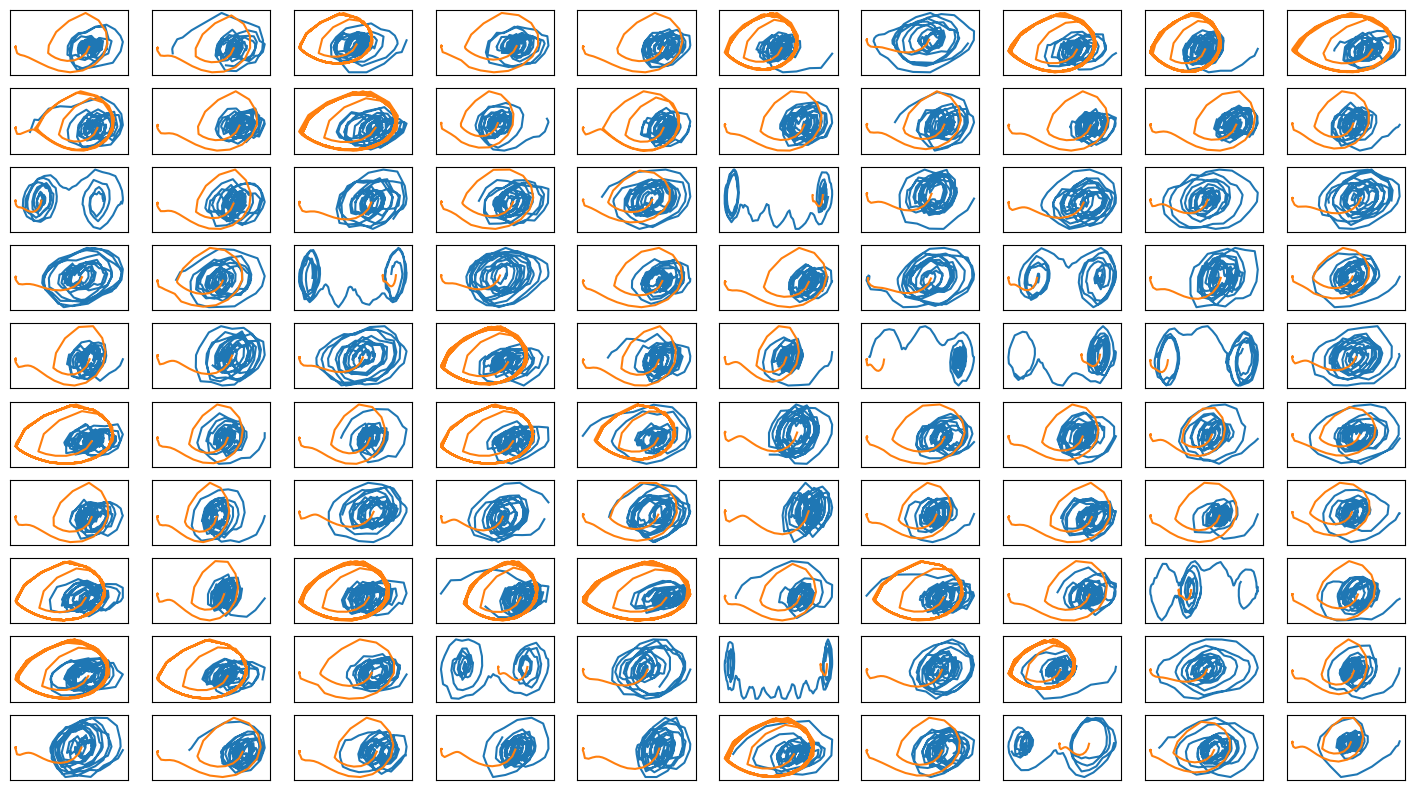

In [8]:
fig = plt.figure(figsize=(18,10*int(len(offline_data)//100)))
ax_list = []
for i in range(len(offline_data)):
    print(vi.offline_data[i][:,1].max(), end="")
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-1].plot(vi.offline_data[i][:,0], vi.offline_data[i][:,1]) 
    ax_list[-1].plot(vi.debug_realenv_rolloutdata[i][:,0], vi.debug_realenv_rolloutdata[i][:,1]) 
print("オフラインデータvs実環境方策rollout")
plt.show()

In [9]:
train_curve1, valid_curve1 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=1)
vi.update_mulogvar_offlinedata()

# train_curve2, valid_curve2 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=2)
# vi.update_mulogvar_offlinedata()

# train_curve3, valid_curve3 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=3)
# vi.update_mulogvar_offlinedata()



train_vae: enc_dec
train: iter 0  trainloss 564.80746  validloss 521.61936±0.00000  bestvalidloss 521.61936  last_update 0
train: iter 1  trainloss 378.27153  validloss 383.18219±0.00000  bestvalidloss 383.18219  last_update 0
train: iter 2  trainloss 866.38983  validloss 301.02917±0.00000  bestvalidloss 301.02917  last_update 0
train: iter 3  trainloss 382.34719  validloss 275.18548±0.00000  bestvalidloss 275.18548  last_update 0
train: iter 4  trainloss 322.20742  validloss 283.06604±0.00000  bestvalidloss 275.18548  last_update 1
train: iter 5  trainloss 312.18004  validloss 278.97745±0.00000  bestvalidloss 275.18548  last_update 2
train: iter 6  trainloss 307.22377  validloss 276.88712±0.00000  bestvalidloss 275.18548  last_update 3
train: iter 7  trainloss 301.51352  validloss 272.58753±0.00000  bestvalidloss 272.58753  last_update 0
train: iter 8  trainloss 297.33475  validloss 263.94589±0.00000  bestvalidloss 263.94589  last_update 0
train: iter 9  trainloss 301.89171  validloss

train: iter 78  trainloss -391.68902  validloss -592.62195±0.00000  bestvalidloss -592.62195  last_update 0
train: iter 79  trainloss -394.13278  validloss -536.72880±0.00000  bestvalidloss -592.62195  last_update 1
train: iter 80  trainloss -406.05153  validloss -429.62801±0.00000  bestvalidloss -592.62195  last_update 2
train: iter 81  trainloss -439.47740  validloss -639.50241±0.00000  bestvalidloss -639.50241  last_update 0
train: iter 82  trainloss -418.74998  validloss -655.30130±0.00000  bestvalidloss -655.30130  last_update 0
train: iter 83  trainloss -453.04288  validloss -640.43770±0.00000  bestvalidloss -655.30130  last_update 1
train: iter 84  trainloss -451.40230  validloss -612.86175±0.00000  bestvalidloss -655.30130  last_update 2
train: iter 85  trainloss -441.91303  validloss -628.90173±0.00000  bestvalidloss -655.30130  last_update 3
train: iter 86  trainloss -476.25595  validloss -630.43617±0.00000  bestvalidloss -655.30130  last_update 4
train: iter 87  trainloss -4

train: iter 154  trainloss -638.91708  validloss -801.19511±0.00000  bestvalidloss -803.70406  last_update 5
train: iter 155  trainloss -501.57979  validloss -790.53902±0.00000  bestvalidloss -803.70406  last_update 6
train: iter 156  trainloss -483.71753  validloss -388.73680±0.00000  bestvalidloss -803.70406  last_update 7
train: iter 157  trainloss -541.80607  validloss -680.12705±0.00000  bestvalidloss -803.70406  last_update 8
train: iter 158  trainloss -572.04038  validloss -781.94334±0.00000  bestvalidloss -803.70406  last_update 9
train: iter 159  trainloss -605.60162  validloss -798.85034±0.00000  bestvalidloss -803.70406  last_update 10
train: iter 160  trainloss -619.78965  validloss -781.84604±0.00000  bestvalidloss -803.70406  last_update 11
train: iter 161  trainloss -604.83557  validloss -797.80455±0.00000  bestvalidloss -803.70406  last_update 12
train: iter 162  trainloss -612.52559  validloss -802.65659±0.00000  bestvalidloss -803.70406  last_update 13
train: iter 163

train: iter 229  trainloss -657.38713  validloss -853.27307±0.00000  bestvalidloss -858.30117  last_update 13
train: iter 230  trainloss -648.25148  validloss -841.84651±0.00000  bestvalidloss -858.30117  last_update 14
train: iter 231  trainloss -665.19217  validloss -826.08401±0.00000  bestvalidloss -858.30117  last_update 15
train: iter 232  trainloss -659.71353  validloss -843.40936±0.00000  bestvalidloss -858.30117  last_update 16
train: iter 233  trainloss -657.80730  validloss -821.39319±0.00000  bestvalidloss -858.30117  last_update 17
train: iter 234  trainloss -650.54552  validloss -842.75794±0.00000  bestvalidloss -858.30117  last_update 18
train: iter 235  trainloss -672.41667  validloss -826.73196±0.00000  bestvalidloss -858.30117  last_update 19
train: iter 236  trainloss -653.16501  validloss -803.94448±0.00000  bestvalidloss -858.30117  last_update 20
train: iter 237  trainloss -657.26199  validloss -819.26567±0.00000  bestvalidloss -858.30117  last_update 21
train: ite

train: iter 304  trainloss -666.50284  validloss -845.54276±0.00000  bestvalidloss -873.85633  last_update 13
train: iter 305  trainloss -689.51275  validloss -827.16607±0.00000  bestvalidloss -873.85633  last_update 14
train: iter 306  trainloss -682.43092  validloss -855.67308±0.00000  bestvalidloss -873.85633  last_update 15
train: iter 307  trainloss -669.62181  validloss -840.61200±0.00000  bestvalidloss -873.85633  last_update 16
train: iter 308  trainloss -685.22004  validloss -853.55449±0.00000  bestvalidloss -873.85633  last_update 17
train: iter 309  trainloss -685.18649  validloss -856.16266±0.00000  bestvalidloss -873.85633  last_update 18
train: iter 310  trainloss -681.23456  validloss -827.56114±0.00000  bestvalidloss -873.85633  last_update 19
train: iter 311  trainloss -673.61587  validloss -880.41942±0.00000  bestvalidloss -880.41942  last_update 0
train: iter 312  trainloss -673.81162  validloss -869.74205±0.00000  bestvalidloss -880.41942  last_update 1
train: iter 

train: iter 379  trainloss -672.53467  validloss -876.33347±0.00000  bestvalidloss -886.44882  last_update 10
train: iter 380  trainloss -682.31780  validloss -854.75049±0.00000  bestvalidloss -886.44882  last_update 11
train: iter 381  trainloss -678.57704  validloss -884.32963±0.00000  bestvalidloss -886.44882  last_update 12
train: iter 382  trainloss -687.92751  validloss -849.02158±0.00000  bestvalidloss -886.44882  last_update 13
train: iter 383  trainloss -674.48789  validloss -843.45360±0.00000  bestvalidloss -886.44882  last_update 14
train: iter 384  trainloss -687.39067  validloss -849.59044±0.00000  bestvalidloss -886.44882  last_update 15
train: iter 385  trainloss -671.82358  validloss -862.68898±0.00000  bestvalidloss -886.44882  last_update 16
train: iter 386  trainloss -680.66710  validloss -851.48873±0.00000  bestvalidloss -886.44882  last_update 17
train: iter 387  trainloss -676.47944  validloss -873.24099±0.00000  bestvalidloss -886.44882  last_update 18
train: ite

train: iter 454  trainloss -694.89784  validloss -721.80404±0.00000  bestvalidloss -901.21530  last_update 21
train: iter 455  trainloss -693.58652  validloss -898.68111±0.00000  bestvalidloss -901.21530  last_update 22
train: iter 456  trainloss -705.88072  validloss -866.59337±0.00000  bestvalidloss -901.21530  last_update 23
train: iter 457  trainloss -677.55618  validloss -846.29355±0.00000  bestvalidloss -901.21530  last_update 24
train: iter 458  trainloss -685.10580  validloss -827.27102±0.00000  bestvalidloss -901.21530  last_update 25
train: iter 459  trainloss -704.05522  validloss -875.35115±0.00000  bestvalidloss -901.21530  last_update 26
train: iter 460  trainloss -707.26151  validloss -875.22066±0.00000  bestvalidloss -901.21530  last_update 27
train: iter 461  trainloss -676.39398  validloss -875.75269±0.00000  bestvalidloss -901.21530  last_update 28
train: iter 462  trainloss -677.85041  validloss -811.46554±0.00000  bestvalidloss -901.21530  last_update 29
train: ite

train: iter 530  trainloss -714.59237  validloss -872.23716±0.00000  bestvalidloss -901.21530  last_update 97
train: iter 531  trainloss -680.67102  validloss -901.91181±0.00000  bestvalidloss -901.91181  last_update 0
train: iter 532  trainloss -715.53556  validloss -866.10762±0.00000  bestvalidloss -901.91181  last_update 1
train: iter 533  trainloss -708.61542  validloss -883.90427±0.00000  bestvalidloss -901.91181  last_update 2
train: iter 534  trainloss -719.38852  validloss -867.86488±0.00000  bestvalidloss -901.91181  last_update 3
train: iter 535  trainloss -679.33811  validloss -740.69188±0.00000  bestvalidloss -901.91181  last_update 4
train: iter 536  trainloss -707.81809  validloss -880.07310±0.00000  bestvalidloss -901.91181  last_update 5
train: iter 537  trainloss -716.19869  validloss -887.94474±0.00000  bestvalidloss -901.91181  last_update 6
train: iter 538  trainloss -701.26675  validloss -904.28360±0.00000  bestvalidloss -904.28360  last_update 0
train: iter 539  t

train: iter 605  trainloss -735.55761  validloss -864.36800±0.00000  bestvalidloss -908.86680  last_update 65
train: iter 606  trainloss -716.57657  validloss -900.70848±0.00000  bestvalidloss -908.86680  last_update 66
train: iter 607  trainloss -710.35985  validloss -861.65281±0.00000  bestvalidloss -908.86680  last_update 67
train: iter 608  trainloss -699.50036  validloss -840.21880±0.00000  bestvalidloss -908.86680  last_update 68
train: iter 609  trainloss -725.62661  validloss -892.06985±0.00000  bestvalidloss -908.86680  last_update 69
train: iter 610  trainloss -727.73574  validloss -892.53166±0.00000  bestvalidloss -908.86680  last_update 70
train: iter 611  trainloss -729.99256  validloss -880.15080±0.00000  bestvalidloss -908.86680  last_update 71
train: iter 612  trainloss -719.90471  validloss -900.52302±0.00000  bestvalidloss -908.86680  last_update 72
train: iter 613  trainloss -731.66155  validloss -897.44605±0.00000  bestvalidloss -908.86680  last_update 73
train: ite

train: iter 680  trainloss -744.28221  validloss -887.51358±0.00000  bestvalidloss -911.00842  last_update 48
train: iter 681  trainloss -519.35924  validloss -894.72280±0.00000  bestvalidloss -911.00842  last_update 49
train: iter 682  trainloss -676.49290  validloss -791.99449±0.00000  bestvalidloss -911.00842  last_update 50
train: iter 683  trainloss -716.84454  validloss -884.65038±0.00000  bestvalidloss -911.00842  last_update 51
train: iter 684  trainloss -710.80699  validloss -881.05563±0.00000  bestvalidloss -911.00842  last_update 52
train: iter 685  trainloss -717.77551  validloss -915.42234±0.00000  bestvalidloss -915.42234  last_update 0
train: iter 686  trainloss -719.53226  validloss -829.16262±0.00000  bestvalidloss -915.42234  last_update 1
train: iter 687  trainloss -732.78394  validloss -880.13504±0.00000  bestvalidloss -915.42234  last_update 2
train: iter 688  trainloss -726.28887  validloss -904.54814±0.00000  bestvalidloss -915.42234  last_update 3
train: iter 68

train: iter 755  trainloss -757.35609  validloss -835.07033±0.00000  bestvalidloss -922.19702  last_update 14
train: iter 756  trainloss -759.53706  validloss -891.76978±0.00000  bestvalidloss -922.19702  last_update 15
train: iter 757  trainloss -762.20675  validloss -923.07261±0.00000  bestvalidloss -923.07261  last_update 0
train: iter 758  trainloss -739.68257  validloss -910.15620±0.00000  bestvalidloss -923.07261  last_update 1
train: iter 759  trainloss -751.32927  validloss -839.13356±0.00000  bestvalidloss -923.07261  last_update 2
train: iter 760  trainloss -761.16701  validloss -860.19556±0.00000  bestvalidloss -923.07261  last_update 3
train: iter 761  trainloss -736.98177  validloss -914.45009±0.00000  bestvalidloss -923.07261  last_update 4
train: iter 762  trainloss -761.08403  validloss -813.45324±0.00000  bestvalidloss -923.07261  last_update 5
train: iter 763  trainloss -767.40206  validloss -920.48517±0.00000  bestvalidloss -923.07261  last_update 6
train: iter 764  

train: iter 831  trainloss -729.27238  validloss -897.27530±0.00000  bestvalidloss -931.43581  last_update 56
train: iter 832  trainloss -766.80132  validloss -923.56313±0.00000  bestvalidloss -931.43581  last_update 57
train: iter 833  trainloss -742.18631  validloss -817.42175±0.00000  bestvalidloss -931.43581  last_update 58
train: iter 834  trainloss -765.96666  validloss -870.77203±0.00000  bestvalidloss -931.43581  last_update 59
train: iter 835  trainloss -756.63211  validloss -899.75344±0.00000  bestvalidloss -931.43581  last_update 60
train: iter 836  trainloss -773.69363  validloss -857.23753±0.00000  bestvalidloss -931.43581  last_update 61
train: iter 837  trainloss -774.16075  validloss -907.16910±0.00000  bestvalidloss -931.43581  last_update 62
train: iter 838  trainloss -766.81912  validloss -917.18311±0.00000  bestvalidloss -931.43581  last_update 63
train: iter 839  trainloss -736.32696  validloss -892.86248±0.00000  bestvalidloss -931.43581  last_update 64
train: ite

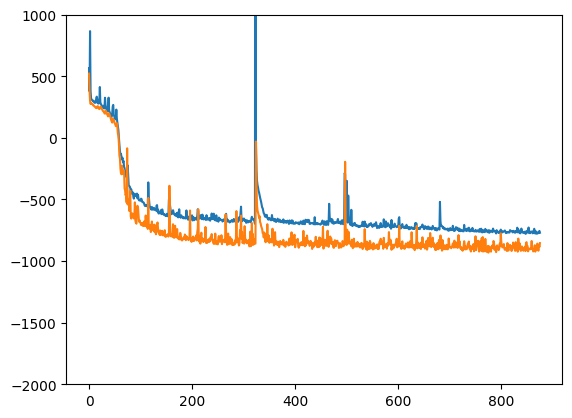

In [10]:
plt.plot(train_curve1)
plt.plot(valid_curve1)
plt.ylim([-2000, 1000])
plt.show()

# plt.plot(train_curve2)
# plt.plot(valid_curve2)
# plt.show()

# plt.plot(train_curve3)
# plt.plot(valid_curve3)
# plt.show()

In [11]:
# vi.load()
# vi.update_mulogvar_offlinedata()

In [12]:
vi.get_sim_rollout_mdppolicy_data_fixlen()
simdata1 = copy.deepcopy(vi.simenv_rolloutdata)
vi.get_sim_rollout_mdppolicy_data_fixlen()
simdata2 = copy.deepcopy(vi.simenv_rolloutdata)
vi.get_sim_rollout_mdppolicy_data_fixlen()
simdata3 = copy.deepcopy(vi.simenv_rolloutdata)


0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   
0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   
0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56

実環境方策rollout vs Sim環境方策rollout


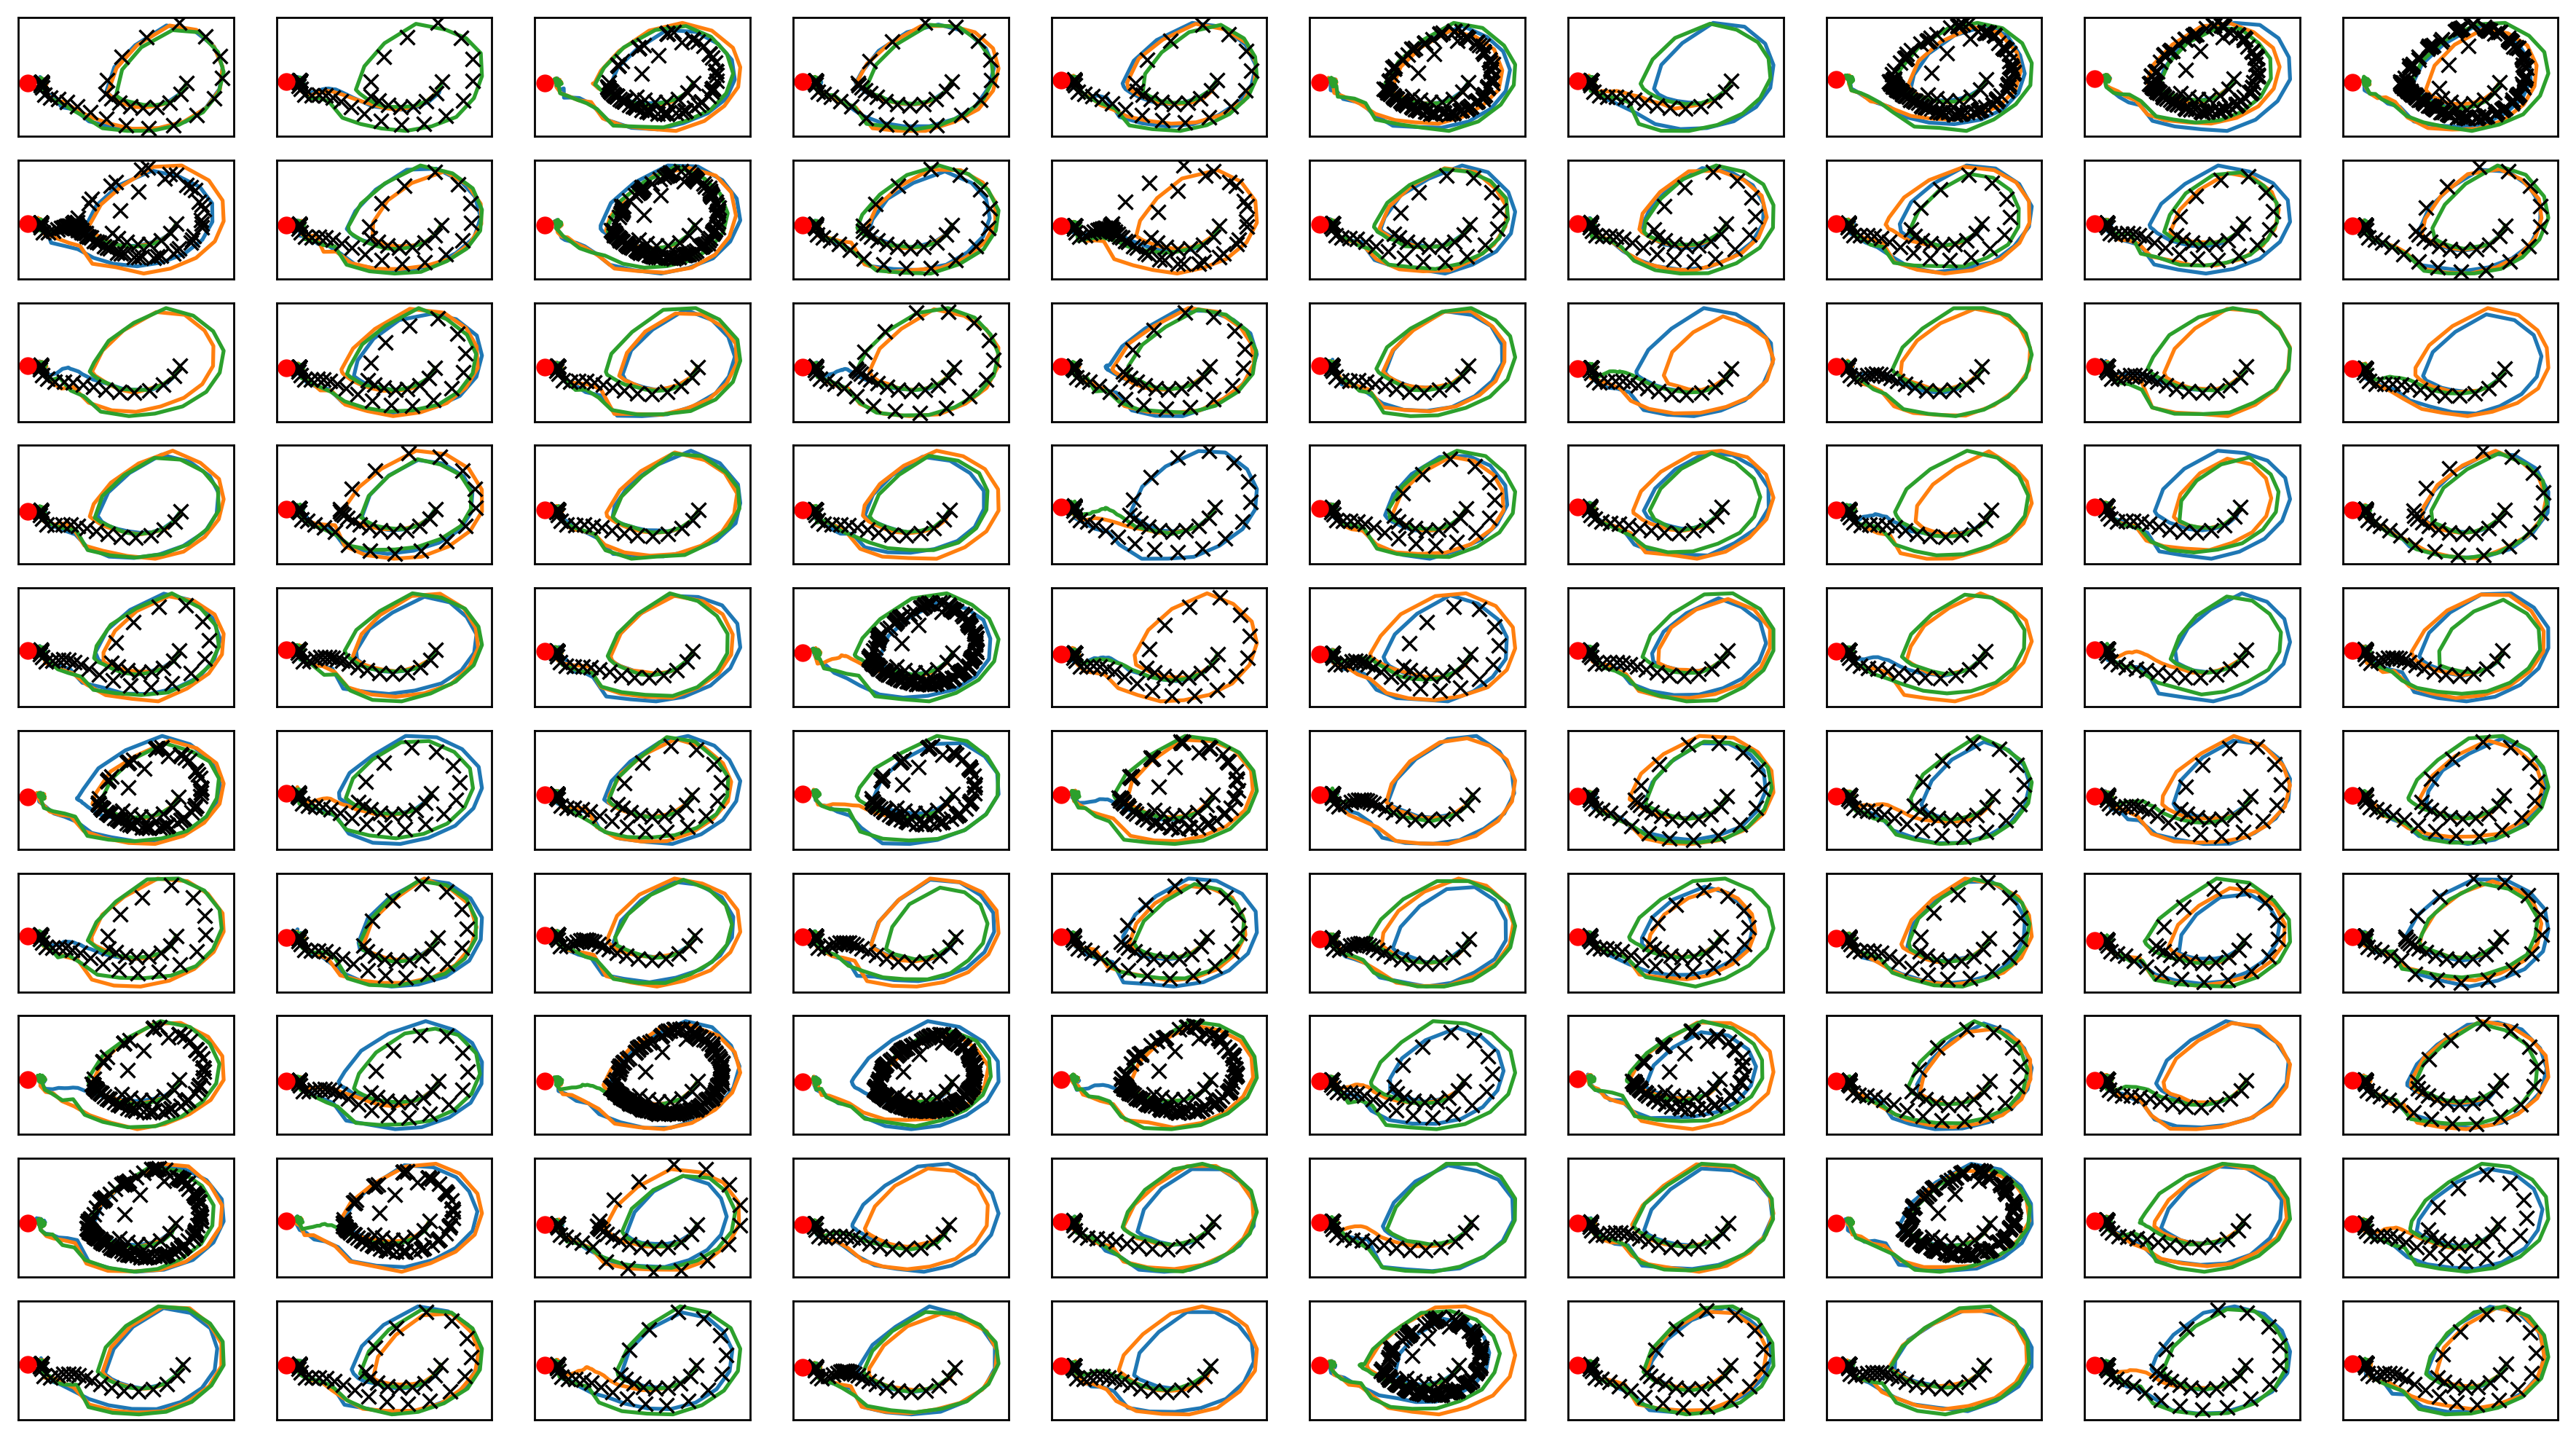

In [13]:


fig = plt.figure(figsize=(18,10*int(len(offline_data)//100)), dpi=250)
fig.patch.set_facecolor('white')
ax_list = []
for i in range(len(offline_data)):
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-1].plot(simdata1[i][:,0], simdata1[i][:,1]) 
    ax_list[-1].plot(simdata2[i][:,0], simdata2[i][:,1]) 
    ax_list[-1].plot(simdata3[i][:,0], simdata3[i][:,1]) 
    ax_list[-1].plot(vi.debug_realenv_rolloutdata[i][:,0], vi.debug_realenv_rolloutdata[i][:,1],"kx")
    ax_list[-1].plot(0, 0,"ro")     

plt.savefig(figfilenamehead+"two_stage.png")
plt.savefig(figfilenamehead+"two_stage.eps")
# plt.savefig(figfilenamehead+"two_stage.pdf")

print("実環境方策rollout vs Sim環境方策rollout")

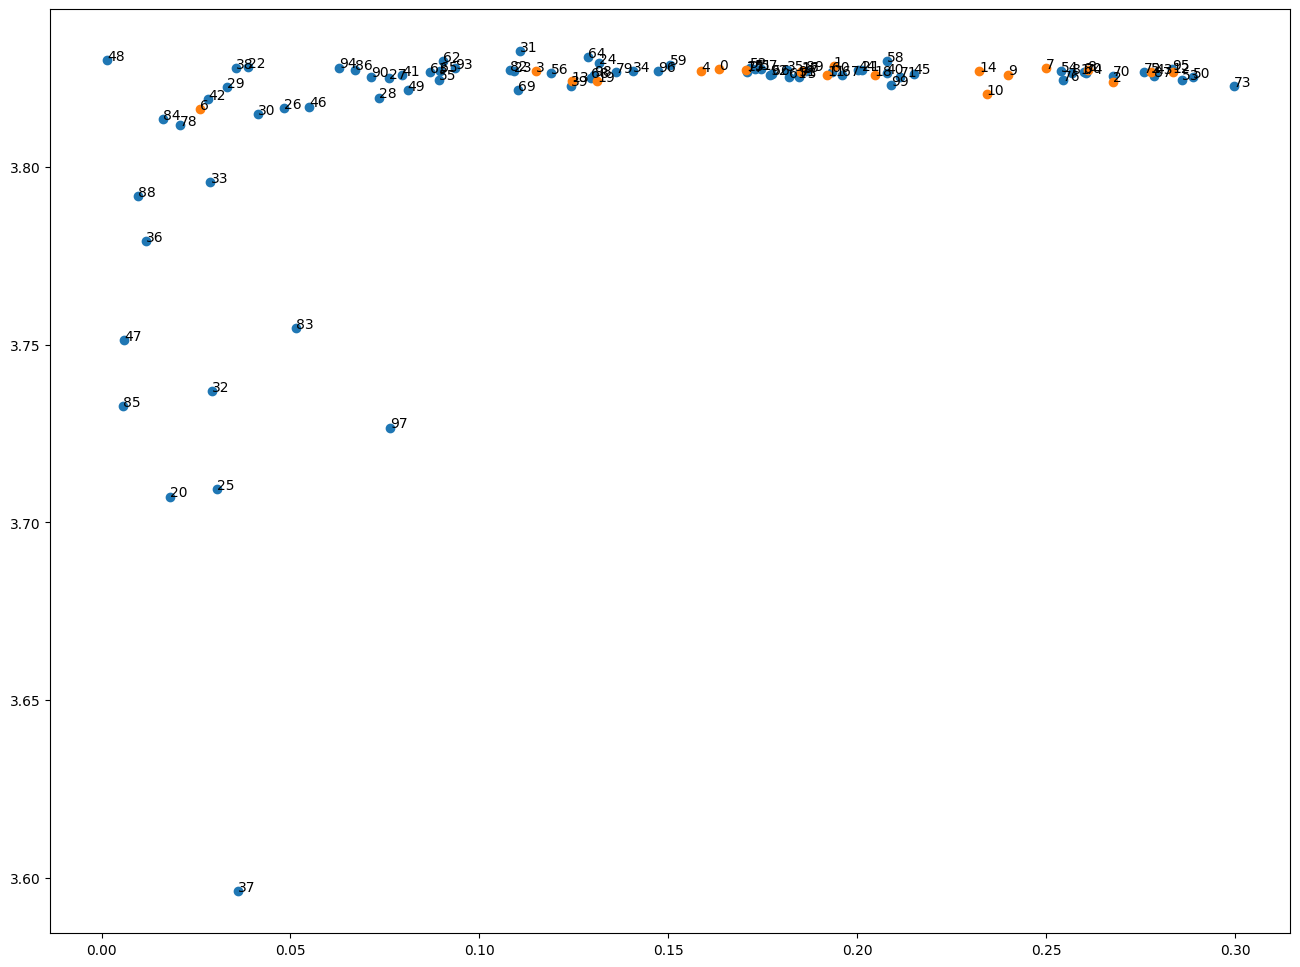

[0.16346495 0.19376823 0.2675319  0.11503246 0.15866848 0.27767899
 0.02613879 0.24978595 0.26100364 0.23974757 0.23415875 0.19197631
 0.28340068 0.12439858 0.23227011 0.17053018 0.18529065 0.1850802
 0.20454609 0.13110959 0.01806764 0.20119136 0.03867789 0.10911323
 0.13158045 0.03061344 0.04839286 0.07598748 0.07332768 0.03311254
 0.04145489 0.11061755 0.02913038 0.02882952 0.14059536 0.18145366
 0.01175634 0.03605897 0.03561832 0.1242789  0.20774164 0.07961685
 0.02818215 0.27878886 0.20022311 0.21489816 0.05495741 0.00603226
 0.00140864 0.08100239 0.28865656 0.1728472  0.17167557 0.2858247
 0.2539226  0.08923109 0.11895172 0.17438186 0.20775948 0.15039731
 0.19319706 0.18191796 0.09047245 0.08702328 0.12863061 0.0894847
 0.17726183 0.19596025 0.12942553 0.11026856 0.26757701 0.21116658
 0.27584478 0.2996541  0.26043782 0.18466787 0.25440247 0.17073022
 0.0207501  0.1360628  0.2599147  0.256741   0.10799342 0.0514889
 0.0163014  0.00555654 0.06717741 0.27842439 0.00955168 0.18644352

In [14]:
plt.figure(figsize=(16,12))
np_mulogvar = vi.mulogvar_offlinedata.numpy()

plt.plot(debug_info[vi.validdata_num:,1], np_mulogvar[vi.validdata_num:,0], "o")
plt.plot(debug_info[:vi.validdata_num,1], np_mulogvar[:vi.validdata_num,0], "o")

for i in range(len(debug_info)):
    plt.annotate(str(i), xy=(debug_info[i,1],  np_mulogvar[i,0]))
plt.show()
print(debug_info[:,1])
# plt.show()
print("摩擦係数-潜在変数")

平均-対数分散


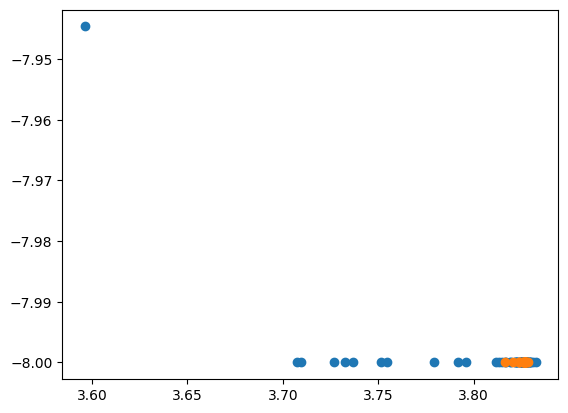

In [15]:

plt.plot(np_mulogvar[vi.validdata_num:,0],np_mulogvar[vi.validdata_num:,1], "o")
plt.plot(np_mulogvar[:vi.validdata_num,0],np_mulogvar[:vi.validdata_num,1],  "o")
print("平均-対数分散")

In [16]:
train_curve, valid_curve = vi.train_initial_belief(num_iter=100000, lr=1e-3, early_stop_step=default_early)


train: iter 0  trainloss 7.79179  validloss 8.25321±0.00000  bestvalidloss 8.25321  last_update 0
train: iter 1  trainloss 7.05625  validloss 7.46895±0.00000  bestvalidloss 7.46895  last_update 0
train: iter 2  trainloss 6.47231  validloss 6.76698±0.00000  bestvalidloss 6.76698  last_update 0
train: iter 3  trainloss 5.94530  validloss 6.23457±0.00000  bestvalidloss 6.23457  last_update 0
train: iter 4  trainloss 5.50400  validloss 5.73711±0.00000  bestvalidloss 5.73711  last_update 0
train: iter 5  trainloss 5.12127  validloss 5.32308±0.00000  bestvalidloss 5.32308  last_update 0
train: iter 6  trainloss 4.78173  validloss 4.97552±0.00000  bestvalidloss 4.97552  last_update 0
train: iter 7  trainloss 4.50082  validloss 4.66970±0.00000  bestvalidloss 4.66970  last_update 0
train: iter 8  trainloss 4.24739  validloss 4.39753±0.00000  bestvalidloss 4.39753  last_update 0
train: iter 9  trainloss 4.02019  validloss 4.14864±0.00000  bestvalidloss 4.14864  last_update 0
train: iter 10  trai

train: iter 86  trainloss 0.24753  validloss 0.26541±0.00000  bestvalidloss 0.26541  last_update 0
train: iter 87  trainloss 0.20649  validloss 0.22435±0.00000  bestvalidloss 0.22435  last_update 0
train: iter 88  trainloss 0.16683  validloss 0.18399±0.00000  bestvalidloss 0.18399  last_update 0
train: iter 89  trainloss 0.12580  validloss 0.14318±0.00000  bestvalidloss 0.14318  last_update 0
train: iter 90  trainloss 0.08591  validloss 0.10240±0.00000  bestvalidloss 0.10240  last_update 0
train: iter 91  trainloss 0.04671  validloss 0.06275±0.00000  bestvalidloss 0.06275  last_update 0
train: iter 92  trainloss 0.00622  validloss 0.02193±0.00000  bestvalidloss 0.02193  last_update 0
train: iter 93  trainloss -0.03363  validloss -0.01783±0.00000  bestvalidloss -0.01783  last_update 0
train: iter 94  trainloss -0.07306  validloss -0.05678±0.00000  bestvalidloss -0.05678  last_update 0
train: iter 95  trainloss -0.11324  validloss -0.09797±0.00000  bestvalidloss -0.09797  last_update 0
t

train: iter 168  trainloss -1.75060  validloss -1.92897±0.00000  bestvalidloss -2.00340  last_update 5
train: iter 169  trainloss -1.70604  validloss -1.97491±0.00000  bestvalidloss -2.00340  last_update 6
train: iter 170  trainloss -1.71611  validloss -2.04656±0.00000  bestvalidloss -2.04656  last_update 0
train: iter 171  trainloss -1.65577  validloss -2.02550±0.00000  bestvalidloss -2.04656  last_update 1
train: iter 172  trainloss -1.73733  validloss -1.98758±0.00000  bestvalidloss -2.04656  last_update 2
train: iter 173  trainloss -1.77495  validloss -2.03238±0.00000  bestvalidloss -2.04656  last_update 3
train: iter 174  trainloss -1.74076  validloss -1.96432±0.00000  bestvalidloss -2.04656  last_update 4
train: iter 175  trainloss -1.69639  validloss -2.00811±0.00000  bestvalidloss -2.04656  last_update 5
train: iter 176  trainloss -1.72696  validloss -2.00780±0.00000  bestvalidloss -2.04656  last_update 6
train: iter 177  trainloss -1.72240  validloss -2.05764±0.00000  bestvali

train: iter 252  trainloss -1.72447  validloss -2.18578±0.00000  bestvalidloss -2.18578  last_update 0
train: iter 253  trainloss -1.73767  validloss -2.17879±0.00000  bestvalidloss -2.18578  last_update 1
train: iter 254  trainloss -1.77570  validloss -2.13975±0.00000  bestvalidloss -2.18578  last_update 2
train: iter 255  trainloss -1.88635  validloss -2.13358±0.00000  bestvalidloss -2.18578  last_update 3
train: iter 256  trainloss -1.79607  validloss -2.07904±0.00000  bestvalidloss -2.18578  last_update 4
train: iter 257  trainloss -1.78782  validloss -2.15587±0.00000  bestvalidloss -2.18578  last_update 5
train: iter 258  trainloss -1.71506  validloss -1.97343±0.00000  bestvalidloss -2.18578  last_update 6
train: iter 259  trainloss -1.75219  validloss -2.11369±0.00000  bestvalidloss -2.18578  last_update 7
train: iter 260  trainloss -1.72624  validloss -2.12820±0.00000  bestvalidloss -2.18578  last_update 8
train: iter 261  trainloss -1.73846  validloss -2.12573±0.00000  bestvali

train: iter 333  trainloss -1.83186  validloss -2.05322±0.00000  bestvalidloss -2.21371  last_update 52
train: iter 334  trainloss -1.77588  validloss -1.99345±0.00000  bestvalidloss -2.21371  last_update 53
train: iter 335  trainloss -1.83556  validloss -2.12313±0.00000  bestvalidloss -2.21371  last_update 54
train: iter 336  trainloss -1.71485  validloss -2.16753±0.00000  bestvalidloss -2.21371  last_update 55
train: iter 337  trainloss -1.71930  validloss -2.15237±0.00000  bestvalidloss -2.21371  last_update 56
train: iter 338  trainloss -1.87651  validloss -2.06899±0.00000  bestvalidloss -2.21371  last_update 57
train: iter 339  trainloss -1.74779  validloss -2.12203±0.00000  bestvalidloss -2.21371  last_update 58
train: iter 340  trainloss -1.72561  validloss -2.09217±0.00000  bestvalidloss -2.21371  last_update 59
train: iter 341  trainloss -1.75693  validloss -2.07941±0.00000  bestvalidloss -2.21371  last_update 60
train: iter 342  trainloss -1.77430  validloss -2.11595±0.00000 

In [17]:
print(vi.initial_belief)


Parameter containing:
tensor([ 3.8101, -6.3619], requires_grad=True)


In [18]:
train_curve, valid_curve = vi.train_penalty(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early)

train: iter 0  trainloss 15.35493  validloss 24.23728±0.00000  bestvalidloss 24.23728  last_update 0
train: iter 1  trainloss 8.12927  validloss 13.63416±0.00000  bestvalidloss 13.63416  last_update 0
train: iter 2  trainloss 4.79946  validloss 6.37409±0.00000  bestvalidloss 6.37409  last_update 0
train: iter 3  trainloss 3.86111  validloss 3.60455±0.00000  bestvalidloss 3.60455  last_update 0
train: iter 4  trainloss 3.53523  validloss 2.53861±0.00000  bestvalidloss 2.53861  last_update 0
train: iter 5  trainloss 3.44363  validloss 2.04781±0.00000  bestvalidloss 2.04781  last_update 0
train: iter 6  trainloss 3.37950  validloss 1.93088±0.00000  bestvalidloss 1.93088  last_update 0
train: iter 7  trainloss 3.34054  validloss 1.80488±0.00000  bestvalidloss 1.80488  last_update 0
train: iter 8  trainloss 3.32875  validloss 1.73921±0.00000  bestvalidloss 1.73921  last_update 0
train: iter 9  trainloss 3.30283  validloss 1.64140±0.00000  bestvalidloss 1.64140  last_update 0
train: iter 10 

train: iter 83  trainloss 2.51450  validloss 1.28430±0.00000  bestvalidloss 1.14948  last_update 23
train: iter 84  trainloss 2.49294  validloss 1.18899±0.00000  bestvalidloss 1.14948  last_update 24
train: iter 85  trainloss 2.53056  validloss 1.32540±0.00000  bestvalidloss 1.14948  last_update 25
train: iter 86  trainloss 2.52334  validloss 1.30045±0.00000  bestvalidloss 1.14948  last_update 26
train: iter 87  trainloss 2.53421  validloss 1.25139±0.00000  bestvalidloss 1.14948  last_update 27
train: iter 88  trainloss 2.50617  validloss 1.33063±0.00000  bestvalidloss 1.14948  last_update 28
train: iter 89  trainloss 2.53377  validloss 1.24159±0.00000  bestvalidloss 1.14948  last_update 29
train: iter 90  trainloss 2.53137  validloss 1.26748±0.00000  bestvalidloss 1.14948  last_update 30
train: iter 91  trainloss 2.51389  validloss 1.26138±0.00000  bestvalidloss 1.14948  last_update 31
train: iter 92  trainloss 2.50226  validloss 1.31824±0.00000  bestvalidloss 1.14948  last_update 32


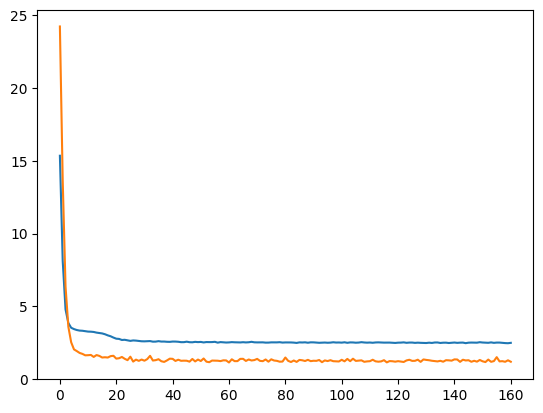

In [19]:
plt.plot(train_curve)
plt.plot(valid_curve)

In [20]:
vi.save(ckpt_key="unweighted")

base save ckpt ckpt_basevi_pendulum_unweighted
base load self.initial_belief.data.sum() tensor(-2.5518)
base load dec.state_dict()['net_phat.0.weight'].sum() tensor(2.2815)


In [21]:
print(vi.h_min_tilde)

-5.918696


In [22]:
# for reproducibility check
print(np.random.randn())
print(torch.randn(1))

-0.0405062160725418
tensor([0.5385])


In [23]:
import torch
from utils import log_gaussian, torch_from_numpy, kld

def tmp_nll(sads_array, z):
    sads_array = torch_from_numpy(sads_array)
    z = torch_from_numpy(np.array(z).reshape(-1))
#     z += torch.randn_like(z) * torch.exp(0.5*vi.initial_belief[vi.z_dim:])
    z += torch.randn_like(z) * np.exp(0.5*(-8))
    saz = torch.cat([sads_array[:, :(vi.sa_dim)], z* torch.ones(len(sads_array), vi.z_dim)], dim=1)
    ds_mulogvar = vi.dec(saz)
    ds = sads_array[:, (vi.sa_dim):(vi.sas_dim)]
    loss = - log_gaussian(ds, # y
               ds_mulogvar[:, :vi.s_dim], # mu
               ds_mulogvar[:, vi.s_dim:] # logvar
               ).sum()
#     print(z)
    loss +=  kld(z,
                 vi.initial_belief[vi.z_dim:],
                 vi.initial_belief.detach()[:vi.z_dim],
                 vi.initial_belief.detach()[vi.z_dim:])
#                  vi.prior[:vi.z_dim],
#                  vi.prior[vi.z_dim:])
    
    return loss.detach().numpy()

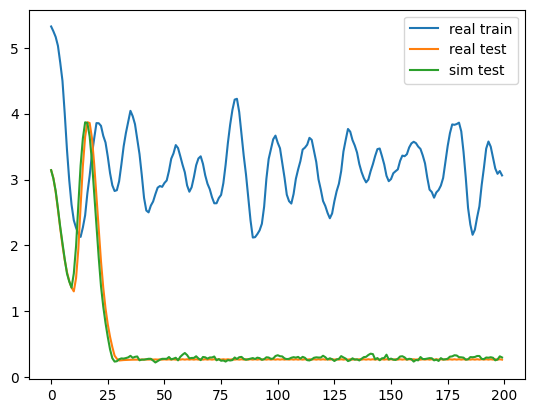

encoder [ 3.8240373 -8.       ]
initial_belief tensor([ 3.8101, -6.3619])
real train tensor([ 3.8349, -8.0037])
real test tensor([ 3.8600, -8.0173])
sim tensor([ 3.8031, -6.3700])


In [24]:
# i = 24
i = 19


tmp_data = 1 * vi.offline_data[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief1 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="real train")

tmp_data = 1 * vi.debug_realenv_rolloutdata[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief2 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="real test")

tmp_data = 1 * simdata1[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief3 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="sim test")
plt.legend()
plt.show()


print("encoder", vi.mulogvar_offlinedata[i].numpy())
print("initial_belief", vi.initial_belief.data)
print("real train",belief1)
print("real test",belief2)
print("sim", belief3)

-1.0


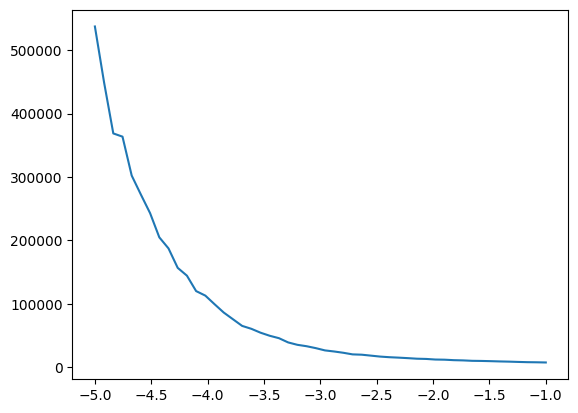

In [25]:
# tmp_data = 1 * vi.offline_data[i]
# tmp_data = 1 * vi.debug_realenv_rolloutdata[i]
tmp_data = 1 * simdata1[i]

np_mulogvar = vi.mulogvar_offlinedata.numpy()

ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])

z_array = np.linspace(np_mulogvar[:,0].min()-1,np_mulogvar[:,0].max()+1)
z_array = np.linspace(-5,-1)

nll_list = []
for i in range(len(z_array)):
    nll_list.append(tmp_nll(sads_array, z_array[i]))
nll_list = np.array(nll_list)
plt.plot(z_array, nll_list)

print(z_array[np.argmin(nll_list)])

In [26]:
# for reproducibility check
print(np.random.randn())
print(torch.randn(1))

-1.3352835133444585
tensor([-1.2660])
